In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# For time stamps
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode()
# stocks related missing info
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','T','NKE']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','T','NKE']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN, T, NKE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","NIKE", "AT&T"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-08-22  135.720001  136.320007  132.850006  133.220001  133.220001   
2022-08-23  133.410004  134.990005  132.949997  133.619995  133.619995   
2022-08-24  132.750000  135.470001  132.100006  133.800003  133.800003   
2022-08-25  135.259995  137.419998  134.279999  137.279999  137.279999   
2022-08-26  136.550003  137.830002  130.500000  130.750000  130.750000   
2022-08-29  129.899994  131.949997  128.770004  129.789993  129.789993   
2022-08-30  131.250000  132.070007  126.849998  128.729996  128.729996   
2022-08-31  129.449997  130.589996  126.739998  126.769997  126.769997   
2022-09-01  126.000000  128.020004  123.660004  127.820000  127.820000   
2022-09-02  129.500000  131.380005  126.389999  127.510002  127.510002   

              Volume company_name  
Date                               
2022-08-22  50461500       AMAZON  
2022-08-23  36252100       AMAZON  
2022-08-24  38627000       AMAZON  
2022-08-25  37496300       AMAZON  
2022-08-26  53322700       AMAZON  
2022-08-29  48101600       AMAZON  
2022-08-30  49203000       AMAZON  
2022-08-31  53648700       AMAZON  
2022-09-01  56636100       AMAZON  
2022-09-02  57378500       AMAZON

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-09-03  153.759995  154.630005  153.089996  154.300003  153.440186   
2021-09-07  154.970001  157.259995  154.389999  156.690002  155.816895   
2021-09-08  156.979996  157.039993  153.979996  155.110001  154.245667   
2021-09-09  155.490005  156.110001  153.949997  154.070007  153.211472   
2021-09-10  155.000000  155.479996  148.699997  148.970001  148.139893   
2021-09-13  150.630005  151.419998  148.750000  149.550003  148.716660   
2021-09-14  150.350006  151.070007  146.910004  148.119995  147.294601   
2021-09-15  148.559998  149.440002  146.369995  149.029999  148.199554   
2021-09-16  148.440002  148.970001  147.220001  148.789993  147.960892   
2021-09-17  148.820007  148.820007  145.759995  146.059998  145.246109   

               Volume company_name  
Date                                
2021-09-03   57808700        APPLE  
2021-09-07   82278300        APPLE  
2021-09-08   74420200        APPLE  
2021-09-09   57305700        APPLE  
2021-09-10  140893200        APPLE  
2021-09-13  102404300        APPLE  
2021-09-14  109296300        APPLE  
2021-09-15   83281300        APPLE  
2021-09-16   68034100        APPLE  
2021-09-17  129868800        APPLE

In [ ]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   158.126468  160.122024  156.272341  158.268056  157.786866   
std     12.646765   12.644010   12.522888   12.571876   12.538696   
min    130.070007  132.389999  129.039993  130.059998  129.879593   
25%    148.302494  149.437500  146.515003  148.382500  147.797485   
50%    159.309998  161.495003  156.445000  159.065002  158.704758   
75%    169.232502  171.057503  167.220001  168.970005  168.630119   
max    182.630005  182.940002  179.119995  182.009995  181.259918   

             Volume  
count  2.520000e+02  
mean   8.813533e+07  
std    2.641868e+07  
min    4.100000e+07  
25%    6.947065e+07  
50%    8.237185e+07  
75%    1.002058e+08  
max    1.954327e+08

In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-09-03 to 2022-09-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Summary Stats
GOOG.describe()

In [ ]:
# General info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-09-03 to 2022-09-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
# Summary Stats
MSFT.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   294.134484  297.325952  290.387341  293.946349  292.448200   
std     25.794877   25.481136   25.965228   25.808492   25.168290   
min    243.860001  245.740005  241.509995  242.259995  241.746857   
25%    275.102509  278.242493  270.030006  274.692505  273.876556   
50%    294.300003  296.640015  290.885010  294.490005  292.401154   
75%    309.690002  312.385002  306.649994  310.325012  308.180847   
max    344.619995  349.670013  342.200012  343.109985  340.882812   

             Volume  
count  2.520000e+02  
mean   2.995378e+07  
std    1.094139e+07  
min    1.474790e+07  
25%    2.254075e+07  
50%    2.819260e+07  
75%    3.466212e+07  
max    9.042890e+07

In [ ]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-09-03 to 2022-09-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Summary Stats
AMZN.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   148.175923  150.338732  145.848389  148.016707  148.016707   
std     23.279820   23.016663   23.443101   23.180195   23.180195   
min    102.750000  104.580002  101.260002  102.309998  102.309998   
25%    129.487499  130.718250  125.744999  127.325001  127.325001   
50%    154.203255  156.381500  150.871506  153.428253  153.428253   
75%    167.859245  169.939751  165.621998  168.684250  168.684250   
max    185.634506  188.107498  183.785995  184.802994  184.802994   

             Volume  
count  2.520000e+02  
mean   7.203324e+07  
std    3.149616e+07  
min    3.575400e+07  
25%    5.266600e+07  
50%    6.378700e+07  
75%    8.234812e+07  
max    2.726620e+08

In [ ]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-09-03 to 2022-09-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


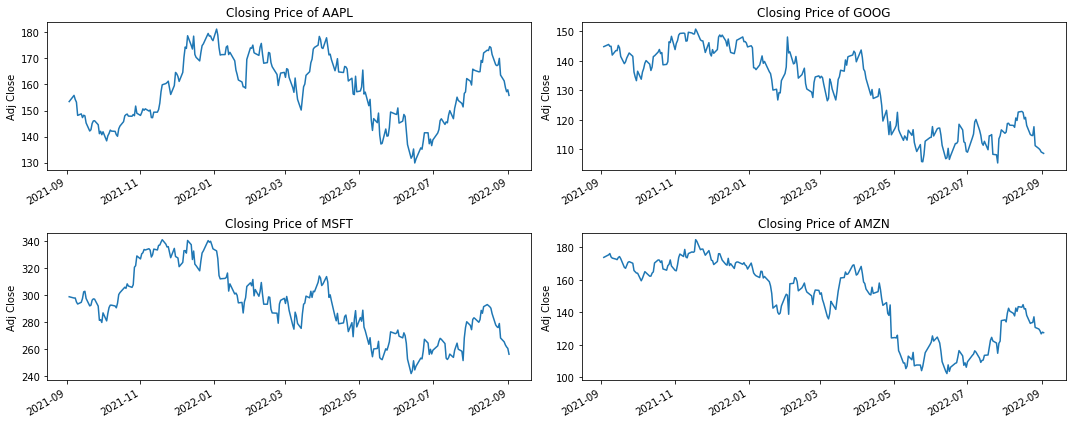

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

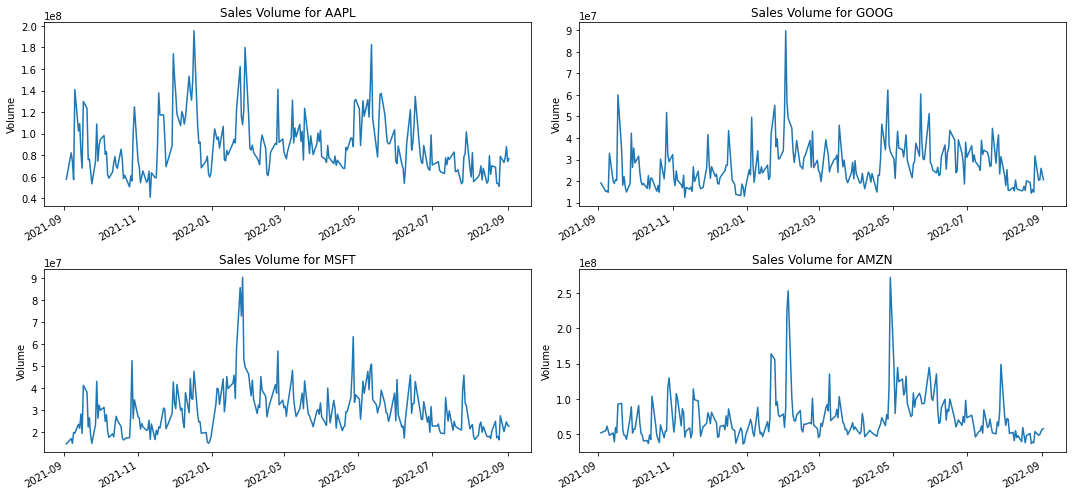

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

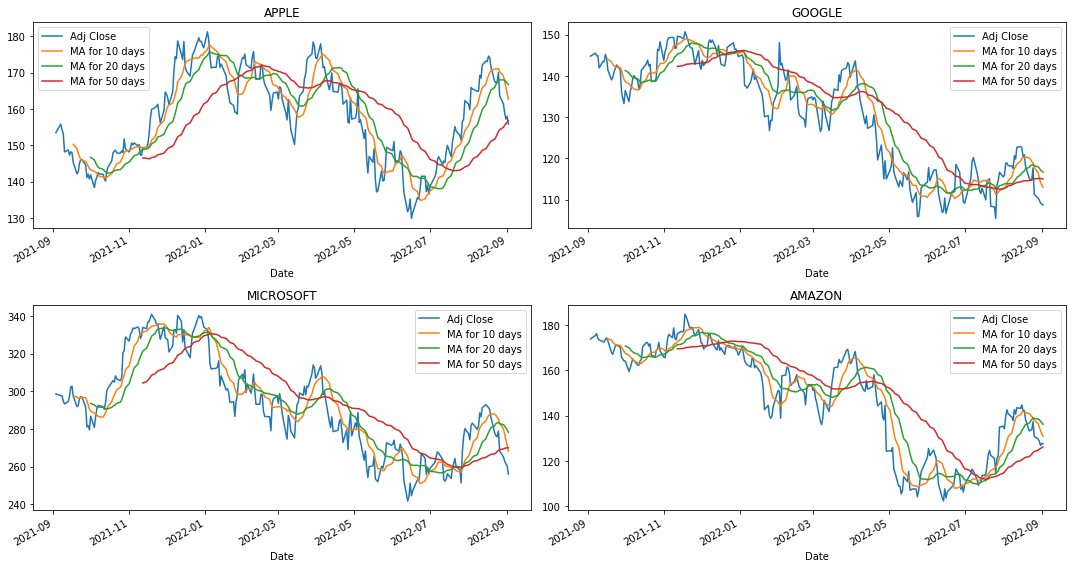

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

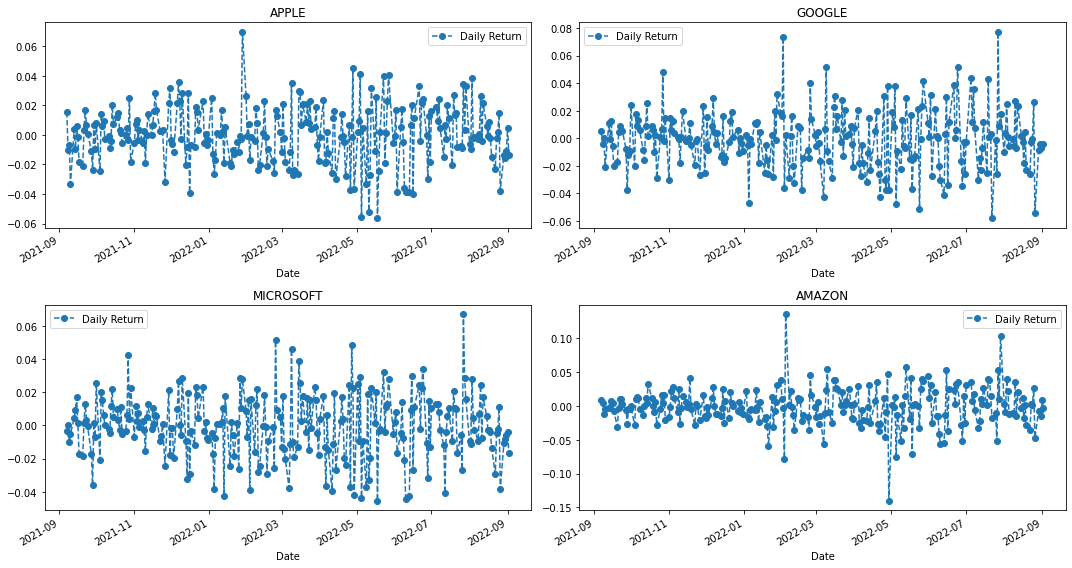

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

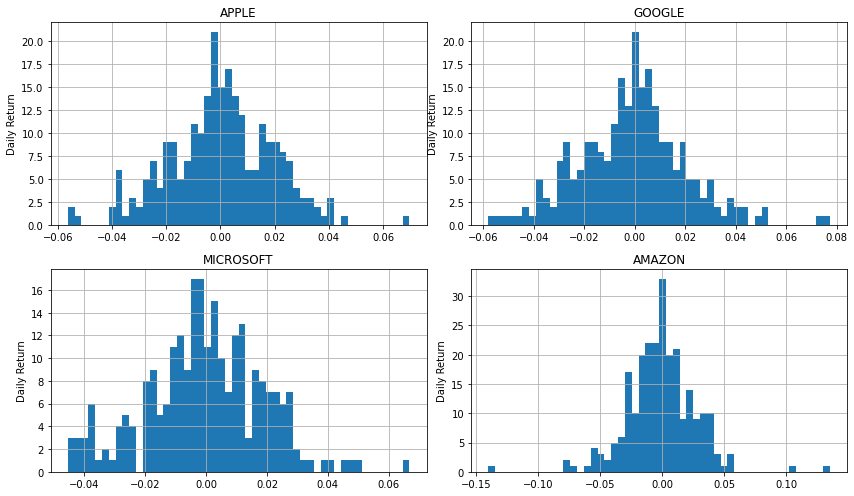

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

724
181


In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
19/19 [==============================] - 11s 133ms/step - loss: 0.2135 - mse: 0.2135 - mae: 0.2792 - val_loss: 0.0766 - val_mse: 0.0766 - val_mae: 0.1379
Epoch 2/40
19/19 [==============================] - 1s 34ms/step - loss: 0.0584 - mse: 0.0584 - mae: 0.1252 - val_loss: 0.0437 - val_mse: 0.0437 - val_mae: 0.1253
Epoch 3/40
19/19 [==============================] - 1s 33ms/step - loss: 0.0476 - mse: 0.0476 - mae: 0.1146 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1059
Epoch 4/40
19/19 [==============================] - 1s 34ms/step - loss: 0.0424 - mse: 0.0424 - mae: 0.1092 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.0952
Epoch 5/40
19/19 [==============================] - 1s 34ms/step - loss: 0.0342 - mse: 0.0342 - mae: 0.0959 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.0799
Epoch 6/40
19/19 [==============================] - 1s 33ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.0916 - val_loss: 0.0300 - val_mse: 0.0300 - val_mae: 0.0998
Epoch 7/40
19/19 [==

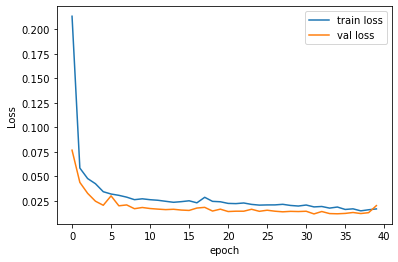

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

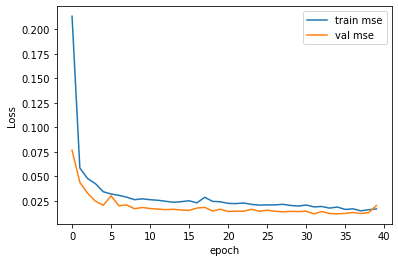

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

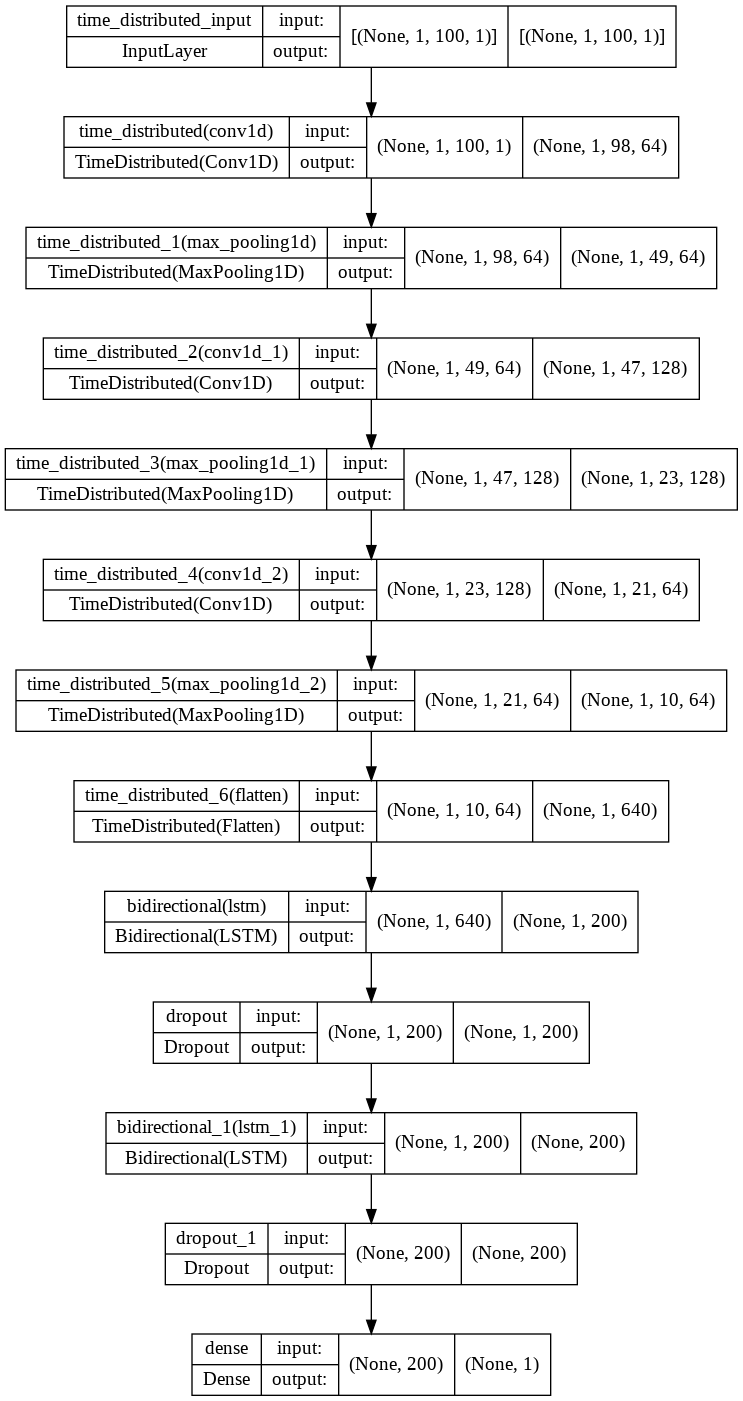

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

6/6 [==============================] - 0s 8ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.0884


[0.02000427059829235, 0.02000427059829235, 0.08840376138687134]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.964209
R2 Score: 0.964209
Max Error: 1.160899


In [ ]:
# First we need to save a model
model.save("model.h5")

In [ ]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [ ]:
model.evaluate(test_X, test_Y)

6/6 [==============================] - 0s 8ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.0884


[0.02000427059829235, 0.02000427059829235, 0.08840376138687134]